**This is the data frame with Insider trading data of JPM.**

In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/drive/MyDrive/DS Project/insider data/jpm insider.xlsx')

# Drop the last four columns by index
df = df.iloc[:, :-4]

# Display the cleaned data
print("Cleaned Data:")
display(df)




Cleaned Data:


,X,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value
0,NaN,2024-06-20 16:35:02,2024-06-20,JPM,Friedman Stacey,GC,S - Sale,$197.58,-4415,102843,-4%,"-$872,311"
1,NaN,2024-06-10 17:04:36,2024-06-10,JPM,Bacon Ashley,Chief Risk Officer,S - Sale,$199.54,-5086,212265,-2%,"-$1,014,857"
2,NaN,2024-05-20 17:19:16,2024-05-20,JPM,Beer Lori A,CIO,S - Sale,$200.64,-5298,46375,-10%,"-$1,062,989"
3,NaN,2024-05-20 17:14:46,2024-05-20,JPM,Friedman Stacey,GC,S - Sale,$200.65,-4415,107258,-4%,"-$885,862"
4,NaN,2024-05-14 16:43:43,2024-05-14,JPM,Lake Marianne,CEO CCB,S - Sale,$200.02,-11734,221031,-5%,"-$2,347,065"
...,...,...,...,...,...,...,...,...,...,...,...,...
356,D,2004-01-26 17:16:31,2004-01-23,JPM,McDavid William H,GC,S - Sale+OE,$39.94,-27859,562135,-5%,"-$1,112,688"
357,D,2003-11-14 13:20:13,2003-11-13,JPM,Staley James E,MD,S - Sale+OE,$35.84,-13810,225462,-6%,"-$494,950"
358,NaN,2003-11-10 11:14:59,2003-11-06,JPM,McCree Donald H III,MD,S - Sale,$36.32,-14170,223635,-6%,"-$514,657"
359,NaN,2003-10-28 15:12:08,2003-10-27,JPM,Schmidlin John W,MD,S - Sale,$35.22,-8000,249152,-3%,"-$281,760"


In [2]:
# Remove any leading or trailing spaces in column names
df.columns = df.columns.str.strip()

# Print column names to confirm the clean-up
print(df.columns)

Index(['X', 'Filing Date', 'Trade Date', 'Ticker', 'Insider Name', 'Title',
       'Trade Type', 'Price', 'Qty', 'Owned', 'ΔOwn', 'Value'],
      dtype='object')


In [3]:
# Drop the first column (index 0) if it's the 'X' column or an unnamed index column
df = df.drop(df.columns[0], axis=1)

# Convert 'Filing Date' and 'Trade Date' to datetime format using index positions 0 and 1
df.iloc[:, 0] = pd.to_datetime(df.iloc[:, 0], errors='coerce')
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1], errors='coerce')

# Clean 'Price' and 'Value' columns using index positions 6 and 10
df.iloc[:, 6] = pd.to_numeric(df.iloc[:, 6].replace('[\$,]', '', regex=True), errors='coerce')
df.iloc[:, 10] = pd.to_numeric(df.iloc[:, 10].replace('[\$,]', '', regex=True), errors='coerce')

# Convert 'Qty' column (index 7) to numeric, handling commas
df.iloc[:, 7] = pd.to_numeric(df.iloc[:, 7].replace('[,]', '', regex=True), errors='coerce')

# Display cleaned data and types to verify
print(df.head())
print(df.dtypes)


          Filing Date Trade Date Ticker     Insider Name               Title  \
0 2024-06-20 16:35:02 2024-06-20    JPM  Friedman Stacey                  GC   
1 2024-06-10 17:04:36 2024-06-10    JPM     Bacon Ashley  Chief Risk Officer   
2 2024-05-20 17:19:16 2024-05-20    JPM      Beer Lori A                 CIO   
3 2024-05-20 17:14:46 2024-05-20    JPM  Friedman Stacey                  GC   
4 2024-05-14 16:43:43 2024-05-14    JPM    Lake Marianne             CEO CCB   

  Trade Type   Price    Qty   Owned  ΔOwn     Value  
0   S - Sale  197.58  -4415  102843   -4%   -872311  
1   S - Sale  199.54  -5086  212265   -2%  -1014857  
2   S - Sale  200.64  -5298   46375  -10%  -1062989  
3   S - Sale  200.65  -4415  107258   -4%   -885862  
4   S - Sale  200.02 -11734  221031   -5%  -2347065  
Filing Date     datetime64[ns]
Trade Date      datetime64[ns]
Ticker                  object
Insider Name            object
Title                   object
Trade Type              object
Price    

In [4]:
df.head(20)

,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value
0,2024-06-20 16:35:02,2024-06-20,JPM,Friedman Stacey,GC,S - Sale,197.58,-4415,102843,-4%,-872311
1,2024-06-10 17:04:36,2024-06-10,JPM,Bacon Ashley,Chief Risk Officer,S - Sale,199.54,-5086,212265,-2%,-1014857
2,2024-05-20 17:19:16,2024-05-20,JPM,Beer Lori A,CIO,S - Sale,200.64,-5298,46375,-10%,-1062989
3,2024-05-20 17:14:46,2024-05-20,JPM,Friedman Stacey,GC,S - Sale,200.65,-4415,107258,-4%,-885862
4,2024-05-14 16:43:43,2024-05-14,JPM,Lake Marianne,CEO CCB,S - Sale,200.02,-11734,221031,-5%,-2347065
5,2024-05-10 16:48:20,2024-05-10,JPM,Leopold Robin,Head of HR,S - Sale,198.86,-3000,63155,-5%,-596577
6,2024-05-08 17:25:52,2024-05-08,JPM,Bacon Ashley,Chief Risk Officer,S - Sale,193.65,-5086,217351,-2%,-984876
7,2024-05-08 17:22:46,2024-05-08,JPM,Erdoes Mary E.,"CEO Asset, Wealth Management",S - Sale,193.66,-15895,585898,-3%,-3078221
8,2024-05-08 17:21:44,2024-05-08,JPM,Piepszak Jennifer,Co-CEO CIB,S - Sale,193.66,-8831,41650,-17%,-1710187
9,2024-05-06 17:55:20,2024-05-06,JPM,Korablina Elena A,Corporate Controller,S - Sale,190.91,-21829,6484,-77%,-4167359


In [5]:
unique_values2 = df.iloc[:,3].unique()
print(unique_values2)

['Friedman Stacey' 'Bacon Ashley' 'Beer Lori A' 'Lake Marianne'
 'Leopold Robin' 'Erdoes Mary E.' 'Piepszak Jennifer' 'Korablina Elena A'
 'Dimon James' 'Rohrbaugh Troy L' 'Scher Peter' 'Petno Douglas B'
 'Pinto Daniel E' 'Hobson Mellody L' 'Giles Nicole' 'Smith Gordon'
 'Burke Stephen B' 'Crown James S' 'Combs Todd A.' 'Zames Matthew E'
 'Donnelly John L' 'Jackson Laban' "O'Donovan Mark" 'Cutler Stephen M'
 'Neal Michael A' 'Cavanagh Michael J' 'Hogan John James'
 'Bisignano Frank' 'Flynn Timothy Patrick' 'Staley James E'
 'Maclin Samuel Todd' 'Raymond Lee R' 'Drew Ina R' 'Mandelbaum Jay'
 'Novak David C' 'Miller Heidi' 'Zubrow Barry L' 'Black Steven D'
 'Winters William T' 'Rauchenberger Louis' 'Bowles Crandall Close'
 'Srednicki Richard J' 'McDavid William H' 'Sclafani Joseph L'
 'Bradley John F' 'Bossidy Lawrence A' 'Biggs John H' 'Farrell John J'
 'Manoogian Richard A' 'Hill Frederick W' 'Dublon Dina'
 'McCree Donald H III' 'Schmidlin John W' 'Pote Harold W']


In [6]:
unique_combinations = df.iloc[:, [3, 4]].drop_duplicates().values.tolist()

print(unique_combinations)
unique_combinations_df = pd.DataFrame(unique_combinations, columns=['Title', 'Insider Name'])

print(unique_combinations_df)

[['Friedman Stacey', 'GC'], ['Bacon Ashley', 'Chief Risk Officer'], ['Beer Lori A', 'CIO'], ['Lake Marianne', 'CEO CCB'], ['Leopold Robin', 'Head of HR'], ['Erdoes Mary E.', 'CEO Asset, Wealth Management'], ['Piepszak Jennifer', 'Co-CEO CIB'], ['Korablina Elena A', 'Corporate Controller'], ['Dimon James', 'COB, CEO'], ['Rohrbaugh Troy L', 'Co-CEO Comm., Invest. Bank'], ['Scher Peter', 'Vice COB'], ['Petno Douglas B', 'CEO Commercial Banking'], ['Piepszak Jennifer', 'Co-CEO CCB'], ['Lake Marianne', 'Co-CEO CCB'], ['Pinto Daniel E', 'Pres, COO, CEO CIB'], ['Hobson Mellody L', 'Dir'], ['Scher Peter', 'EVP'], ['Lake Marianne', 'EVP'], ['Giles Nicole', 'Corporate Controller'], ['Smith Gordon', 'Co-Pres, COO, CEO CCB'], ['Piepszak Jennifer', 'CFO'], ['Burke Stephen B', 'Dir'], ['Pinto Daniel E', 'Co-Pres, COO, CEO CIB'], ['Lake Marianne', 'CFO'], ['Crown James S', 'Dir'], ['Combs Todd A.', 'Dir'], ['Erdoes Mary E.', 'CEO Asset Management'], ['Zames Matthew E', 'COO'], ['Smith Gordon', 'EVP']

In [7]:
unique_combinations_df.head(20)


,Title,Insider Name
0,Friedman Stacey,GC
1,Bacon Ashley,Chief Risk Officer
2,Beer Lori A,CIO
3,Lake Marianne,CEO CCB
4,Leopold Robin,Head of HR
5,Erdoes Mary E.,"CEO Asset, Wealth Management"
6,Piepszak Jennifer,Co-CEO CIB
7,Korablina Elena A,Corporate Controller
8,Dimon James,"COB, CEO"
9,Rohrbaugh Troy L,"Co-CEO Comm., Invest. Bank"


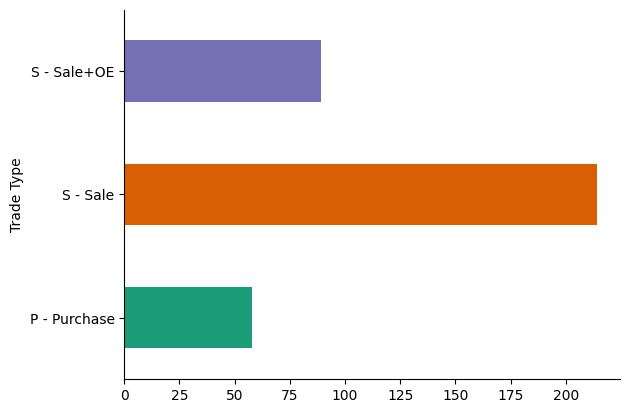

In [8]:
# @title Trade Type

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Trade\xa0Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

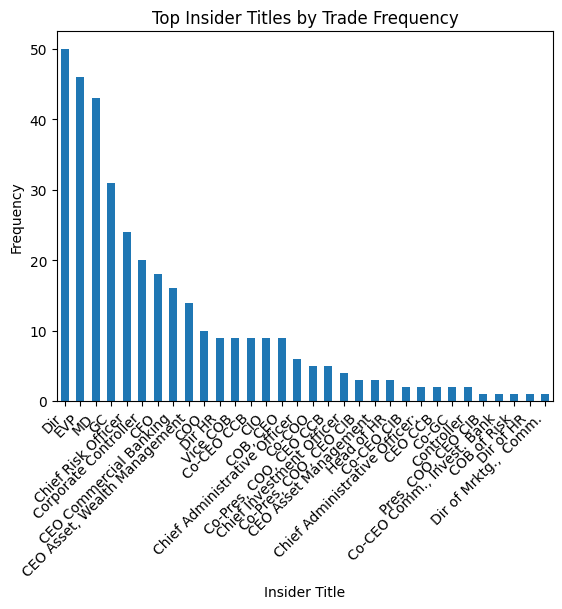

In [9]:
# @title Top Insider Titles by Trade Frequency

import matplotlib.pyplot as plt

# Count the frequency of each Title
title_counts = df['Title'].value_counts()

# Plot the bar chart
title_counts.plot(kind='bar')
plt.xlabel('Insider Title')
plt.ylabel('Frequency')
plt.title('Top Insider Titles by Trade Frequency')
_ = plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

**This is the data frame with historical stock data of JPM.**

In [10]:
import pandas as pd

# Load the CSV file into a DataFrame
historical_df= pd.read_csv('/content/drive/MyDrive/DS Project/insider data/HistoricalPrices JPM.csv')

# Strip any extra spaces from column names
historical_df.columns = historical_df.columns.str.strip()

# Display the column names to ensure they are correctly read
print(historical_df.columns)

# Convert 'Date' column to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'], errors='coerce', dayfirst=False)

# Convert the numeric columns to proper numeric types
historical_df['Open'] = pd.to_numeric(historical_df['Open'], errors='coerce')
historical_df['High'] = pd.to_numeric(historical_df['High'], errors='coerce')
historical_df['Low'] = pd.to_numeric(historical_df['Low'], errors='coerce')
historical_df['Close'] = pd.to_numeric(historical_df['Close'], errors='coerce')
historical_df['Volume'] = pd.to_numeric(historical_df['Volume'], errors='coerce')

# Display the cleaned DataFrame
print(historical_df.head())
print(historical_df.dtypes)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


<ipython-input-10-896a3403a111>:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  historical_df['Date'] = pd.to_datetime(historical_df['Date'], errors='coerce', dayfirst=False)


        Date    Open    High     Low   Close    Volume
0 2024-11-12  240.55  241.46  238.76  239.56   6845980
1 2024-11-11  240.00  242.10  239.00  239.29   9017079
2 2024-11-08  239.34  239.34  235.78  236.98   9502100
3 2024-11-07  244.50  244.57  235.22  236.38  16451070
4 2024-11-06  235.00  248.00  234.77  247.06  23987750
Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object


In [11]:

historical_df.head(20)

,Date,Open,High,Low,Close,Volume
0,2024-11-12,240.55,241.4600,238.760,239.56,6845980
1,2024-11-11,240.00,242.1000,239.000,239.29,9017079
2,2024-11-08,239.34,239.3400,235.780,236.98,9502100
3,2024-11-07,244.50,244.5700,235.220,236.38,16451070
4,2024-11-06,235.00,248.0000,234.770,247.06,23987750
5,2024-11-05,220.03,221.9600,220.000,221.49,5600686
6,2024-11-04,222.65,223.7600,219.170,219.78,8229588
7,2024-11-01,223.56,226.1500,222.700,222.94,6923452
8,2024-10-31,224.70,225.6900,221.820,221.92,7829932
9,2024-10-30,222.54,226.3100,221.580,224.41,7110941


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check summary statistics of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

                         Filing Date                     Trade Date  \
count                            361                            361   
mean   2015-08-24 17:28:42.786703616  2015-08-11 05:59:00.166204928   
min              2003-07-28 16:16:15            2003-07-25 00:00:00   
25%              2011-08-11 12:33:18            2011-08-08 00:00:00   
50%              2015-07-15 17:25:54            2015-07-15 00:00:00   
75%              2020-01-16 16:24:04            2020-01-15 00:00:00   
max              2024-06-20 16:35:02            2024-06-20 00:00:00   
std                              NaN                            NaN   

                 Qty         Owned  
count     361.000000  3.610000e+02  
mean    -8544.764543  7.379070e+05  
min   -821778.000000  0.000000e+00  
25%    -21829.000000  4.471100e+04  
50%    -10000.000000  1.842100e+05  
75%     -3051.000000  3.386760e+05  
max    500000.000000  1.280386e+07  
std     82166.295203  2.307019e+06  
Filing Date     0
Trade Dat

Here we are trying to extract Unique values from insider titles

In [13]:
unique_values = df.iloc[:,4].unique()
print(unique_values)

['GC' 'Chief Risk Officer' 'CIO' 'CEO CCB' 'Head of HR'
 'CEO Asset, Wealth Management' 'Co-CEO CIB' 'Corporate Controller'
 'COB, CEO' 'Co-CEO Comm., Invest. Bank' 'Vice COB'
 'CEO Commercial Banking' 'Co-CEO CCB' 'Pres, COO, CEO CIB' 'Dir' 'EVP'
 'Co-Pres, COO, CEO CCB' 'CFO' 'Co-Pres, COO, CEO CIB'
 'CEO Asset Management' 'COO' 'MD' 'Dir HR' 'COB of Risk' 'Co-COO'
 'Chief Administrative Officer;' 'Chief Administrative Officer'
 'Chief Investment Officer' 'Co-GC' 'Controller' 'Dir of HR'
 'Dir of Mrktg.,  Comm.']


In [14]:
df_filtered = df[df.iloc[:,4]== "CEO Asset, Wealth Management" ]
print(df_filtered)
df_filtered.head()


            Filing Date Trade Date Ticker    Insider Name  \
7   2024-05-08 17:22:46 2024-05-08    JPM  Erdoes Mary E.   
20  2024-02-16 19:36:01 2024-02-16    JPM  Erdoes Mary E.   
26  2024-01-16 19:10:20 2024-01-16    JPM  Erdoes Mary E.   
33  2023-06-15 17:31:57 2023-06-15    JPM  Erdoes Mary E.   
40  2023-05-16 16:34:00 2023-05-15    JPM  Erdoes Mary E.   
44  2023-01-17 20:52:20 2023-01-17    JPM  Erdoes Mary E.   
56  2022-10-18 16:24:36 2022-10-17    JPM  Erdoes Mary E.   
65  2021-07-14 17:49:59 2021-07-14    JPM  Erdoes Mary E.   
70  2021-04-15 18:39:19 2021-04-15    JPM  Erdoes Mary E.   
79  2021-01-21 16:31:40 2021-01-19    JPM  Erdoes Mary E.   
84  2020-07-15 18:41:35 2020-07-15    JPM  Erdoes Mary E.   
89  2020-01-17 16:22:23 2020-01-15    JPM  Erdoes Mary E.   
97  2020-01-15 17:55:15 2020-01-15    JPM  Erdoes Mary E.   
110 2019-04-16 17:41:25 2019-04-15    JPM  Erdoes Mary E.   

                            Title    Trade Type   Price    Qty   Owned  ΔOwn  \
7   

,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value
7,2024-05-08 17:22:46,2024-05-08,JPM,Erdoes Mary E.,"CEO Asset, Wealth Management",S - Sale,193.66,-15895,585898,-3%,-3078221
20,2024-02-16 19:36:01,2024-02-16,JPM,Erdoes Mary E.,"CEO Asset, Wealth Management",S - Sale,178.99,-4814,570003,-1%,-861665
26,2024-01-16 19:10:20,2024-01-16,JPM,Erdoes Mary E.,"CEO Asset, Wealth Management",S - Sale+OE,166.73,-4814,574817,-1%,-802618
33,2023-06-15 17:31:57,2023-06-15,JPM,Erdoes Mary E.,"CEO Asset, Wealth Management",S - Sale,142.15,-8118,560373,-1%,-1154002
40,2023-05-16 16:34:00,2023-05-15,JPM,Erdoes Mary E.,"CEO Asset, Wealth Management",S - Sale,134.81,-8119,568491,-1%,-1094483


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check summary statistics of the dataset
print(historical_df.describe())

# Check for missing values
print(historical_df.isnull().sum())



                                Date         Open        High          Low  \
count                           5623  5623.000000  5623.00000  5623.000000   
mean   2013-09-11 15:27:02.977058560    74.556330    75.31896    73.792103   
min              2002-07-15 00:00:00    15.370000    16.35000    14.960000   
25%              2008-02-12 12:00:00    39.520000    39.97500    39.050000   
50%              2013-09-12 00:00:00    53.720000    54.10000    53.110000   
75%              2019-04-13 12:00:00   108.155000   109.19000   106.875000   
max              2024-11-12 00:00:00   244.500000   248.00000   239.000000   
std                              NaN    46.466287    46.82469    46.129367   

             Close        Volume  
count  5623.000000  5.623000e+03  
mean     74.570216  2.089878e+07  
min      15.450000  1.347300e+06  
25%      39.565000  1.013114e+07  
50%      53.670000  1.417500e+07  
75%     108.000000  2.440254e+07  
max     247.060000  2.172942e+08  
std      46.48939

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Date' and 'Trade Date' (using df.iloc[:, 1]) to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Accessing second column for 'Trade Date'



**Here we are trying to analyze the impact of trades done by insiders with specific titles have on the price movements in historical stock data (for this case we are checking for "CEO Asset, Wealth Management")**

In [17]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "CEO Asset, Wealth Management"
df_filtered = df[df.iloc[:, 4] == "CEO Asset, Wealth Management"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "CEO Asset, Wealth Management"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


**Here we are trying to analyze the impact of trades done by insiders with specific titles have on the price movements in historical stock data (for this case we are checking for "EVP")**

In [18]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "EVP"
df_filtered = df[df.iloc[:, 4] == "EVP"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "EVP"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


**Here we are trying to analyze the impact of trades done by insiders with specific titles have on the price movements in historical stock data (for this case we are checking for "Dir")**

In [19]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "Dir"
df_filtered = df[df.iloc[:, 4] == "Dir"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "Dir"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


**Here we are trying to analyze the impact of trades done by insiders with specific titles have on the price movements in historical stock data (for this case we are checking for "MD")**

In [20]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "MD"
df_filtered = df[df.iloc[:, 4] == "MD"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "MD"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


**Here we are trying to analyze the impact of trades done by insiders with specific titles have on the price movements in historical stock data (for this case we are checking for "GC")**

In [21]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "GC"
df_filtered = df[df.iloc[:, 4] == "GC"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2)
))

# Plot insider sales as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')  # Corrected symbol
))

# Plot insider purchases as lines from the x-axis to the stock price (originating from x-axis)
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')  # Corrected symbol
))

# Update layout for better readability
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "GC"',
    xaxis_title='Date',
    yaxis_title='Stock Price ($)',
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # This ensures that you can hover across the x-axis and see data for all traces
    showlegend=True
)

# Show plot
fig.show()


**Here in addition to analyzing the impact of trades done by insiders with specific titles have on the price movements in historical stock data we are also plotting the transaction value of sale or purchase Trade type with the help of 2nd Y axis (for this case we are checking for "CEO Asset, Wealth Management")**

In [22]:
import pandas as pd
import plotly.graph_objects as go

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "CEO Asset, Wealth Management"
df_filtered = df[df.iloc[:, 4] == "CEO Asset, Wealth Management"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices on the primary y-axis
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2),
    yaxis="y1"  # Assign to primary y-axis
))

# Plot insider sales as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')
))

# Plot insider purchases as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')
))

# Plot the 'Value' column on the secondary y-axis as bars
fig.add_trace(go.Bar(
    x=df_filtered.iloc[:, 1],
    y=df_filtered.iloc[:, 10],  # 'Value' column
    name='Transaction Value',
    marker=dict(color='orange', opacity=0.7),
    yaxis="y2"  # Assign to secondary y-axis
))

# Update layout for dual y-axes
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "CEO Asset, Wealth Management"',
    xaxis_title='Date',
    yaxis=dict(
        title='Stock Price ($)',
        side='left',
        showgrid=True
    ),
    yaxis2=dict(
        title='Transaction Value ($)',
        side='right',
        overlaying='y',  # Overlay this axis on the first
        showgrid=False
    ),
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # Unifies hover info across x-axis
    showlegend=True
)

# Show plot
fig.show()


**Here in addition to analyzing the impact of trades done by insiders with specific titles have on the price movements in historical stock data we are also plotting the transaction value of sale or purchase Trade type with the help of 2nd Y axis (for this case we are checking for "COO")**

In [23]:
import pandas as pd
import plotly.graph_objects as go

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "COO"
df_filtered = df[df.iloc[:, 4] == "COO"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices on the primary y-axis
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2),
    yaxis="y1"  # Assign to primary y-axis
))

# Plot insider sales as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')
))

# Plot insider purchases as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')
))

# Plot the 'Value' column on the secondary y-axis as bars
fig.add_trace(go.Bar(
    x=df_filtered.iloc[:, 1],
    y=df_filtered.iloc[:, 10],  # 'Value' column
    name='Transaction Value',
    marker=dict(color='Black', opacity=0.7),
    yaxis="y2"  # Assign to secondary y-axis
))

# Update layout for dual y-axes
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "COO"',
    xaxis_title='Date',
    yaxis=dict(
        title='Stock Price ($)',
        side='left',
        showgrid=True
    ),
    yaxis2=dict(
        title='Transaction Value ($)',
        side='right',
        overlaying='y',  # Overlay this axis on the first
        showgrid=False
    ),
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # Unifies hover info across x-axis
    showlegend=True
)

# Show plot
fig.show()


**Here in addition to analyzing the impact of trades done by insiders with specific titles have on the price movements in historical stock data we are also plotting the transaction value of sale or purchase Trade type with the help of 2nd Y axis (for this case we are checking for "Dir")**

In [24]:
import pandas as pd
import plotly.graph_objects as go

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "Dir"
df_filtered = df[df.iloc[:, 4] == "Dir"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices on the primary y-axis
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2),
    yaxis="y1"  # Assign to primary y-axis
))

# Plot insider sales as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')
))

# Plot insider purchases as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')
))

# Plot the 'Value' column on the secondary y-axis as bars
fig.add_trace(go.Bar(
    x=df_filtered.iloc[:, 1],
    y=df_filtered.iloc[:, 10],  # 'Value' column
    name='Transaction Value',
    marker=dict(color='Black', opacity=0.7),
    yaxis="y2"  # Assign to secondary y-axis
))

# Update layout for dual y-axes
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "Dir"',
    xaxis_title='Date',
    yaxis=dict(
        title='Stock Price ($)',
        side='left',
        showgrid=True
    ),
    yaxis2=dict(
        title='Transaction Value ($)',
        side='right',
        overlaying='y',  # Overlay this axis on the first
        showgrid=False
    ),
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # Unifies hover info across x-axis
    showlegend=True
)

# Show plot
fig.show()


**Here in addition to analyzing the impact of trades done by insiders with specific titles have on the price movements in historical stock data we are also plotting the transaction value of sale or purchase Trade type with the help of 2nd Y axis (for this case we are checking for "EVP")**

In [25]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'Trade Date' and 'Transaction Value' columns are treated correctly
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "EVP"
df_filtered = df[df.iloc[:, 4].isin(["EVP"])]

# Convert 'Trade Type' column to strings
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices on the primary y-axis
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2),
    yaxis="y1"
))

# Plot insider sales as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')
))

# Plot insider purchases as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')
))

# Plot 'Transaction Value' column on the secondary y-axis as bars
fig.add_trace(go.Bar(
    x=df_filtered.iloc[:, 1],
    y=df_filtered.iloc[:, 10],  # 'Transaction Value' column
    name='Transaction Value',
    marker=dict(color='black'),
    yaxis="y2",
    width=86400000  # Adjusts bar width to 1 day in milliseconds
))

# Update layout for dual y-axes with a ±2 million range on y-axis 2
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "EVP"',
    xaxis_title='Date',
    yaxis=dict(
        title='Stock Price ($)',
        side='left',
        showgrid=True
    ),
    yaxis2=dict(
        title='Transaction Value ($)',
        side='right',
        overlaying='y',
        showgrid=False,
        range=[-2000000, 2000000],  # Sets the range to ±2 million
        tickformat=","
    ),
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',
    showlegend=True
)

fig.show()


**Here in addition to analyzing the impact of trades done by insiders with specific titles have on the price movements in historical stock data we are also plotting the transaction value of sale or purchase Trade type with the help of 2nd Y axis (for this case we are checking for "MD")**

In [26]:
import pandas as pd
import plotly.graph_objects as go

# Convert dates to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # 'Trade Date' column by index

# Filter for transactions by "MD"
df_filtered = df[df.iloc[:, 4] == "MD"]

# Ensure 'Trade Type' column (index 5) is treated as strings to avoid .str accessor errors
df_filtered.iloc[:, 5] = df_filtered.iloc[:, 5].astype(str)

# Separate sale and purchase transactions based on the 'Trade Type' column (index 5)
df_sales = df_filtered[df_filtered.iloc[:, 5].str.contains("S - Sale", na=False)]
df_purchases = df_filtered[df_filtered.iloc[:, 5].str.contains("P - Purchase", na=False)]

# Create the figure
fig = go.Figure()

# Plot the historical stock prices on the primary y-axis
fig.add_trace(go.Scatter(
    x=historical_df['Date'],
    y=historical_df['Close'],
    mode='lines',
    name='JPM Stock Price',
    line=dict(color='blue', width=2),
    yaxis="y1"  # Assign to primary y-axis
))

# Plot insider sales as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_sales.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_sales.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Sales',
    line=dict(color='red', width=2, dash='dash'),
    marker=dict(symbol='triangle-down', size=8, color='red')
))

# Plot insider purchases as lines from the x-axis to the stock price
fig.add_trace(go.Scatter(
    x=df_purchases.iloc[:, 1],
    y=historical_df.set_index('Date').reindex(df_purchases.iloc[:, 1])['Close'],
    mode='lines+markers',
    name='Insider Purchases',
    line=dict(color='green', width=2, dash='dot'),
    marker=dict(symbol='triangle-up', size=8, color='green')
))

# Plot the 'Value' column on the secondary y-axis as bars
fig.add_trace(go.Bar(
    x=df_filtered.iloc[:, 1],
    y=df_filtered.iloc[:, 10],  # 'Value' column
    name='Transaction Value',
    marker=dict(color='BROWN', opacity=1.0),
    yaxis="y2"  # Assign to secondary y-axis
))

# Update layout for dual y-axes
fig.update_layout(
    title='JPM Stock Price with Insider Transactions by "MD"',
    xaxis_title='Date',
    yaxis=dict(
        title='Stock Price ($)',
        side='left',
        showgrid=True
    ),
    yaxis2=dict(
        title='Transaction Value ($)',
        side='right',
        overlaying='y',  # Overlay this axis on the first
        showgrid=False
    ),
    xaxis=dict(
        showgrid=True,
        tickformat='%Y-%m-%d',
        rangeslider=dict(visible=True)
    ),
    hovermode='x unified',  # Unifies hover info across x-axis
    showlegend=True
)

# Show plot
fig.show()


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Loading, merging, and cleaning data
historical_df = pd.read_csv('/content/drive/MyDrive/DS Project/insider data/HistoricalPrices JPM.csv')
historical_df.columns = historical_df.columns.str.strip()
historical_df['Date'] = pd.to_datetime(historical_df['Date'], errors='coerce')
historical_df['Open'] = pd.to_numeric(historical_df['Open'], errors='coerce')
historical_df['Close'] = pd.to_numeric(historical_df['Close'], errors='coerce')
print(historical_df.head())


<ipython-input-27-42d254aebe87>:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



        Date    Open    High     Low   Close    Volume
0 2024-11-12  240.55  241.46  238.76  239.56   6845980
1 2024-11-11  240.00  242.10  239.00  239.29   9017079
2 2024-11-08  239.34  239.34  235.78  236.98   9502100
3 2024-11-07  244.50  244.57  235.22  236.38  16451070
4 2024-11-06  235.00  248.00  234.77  247.06  23987750


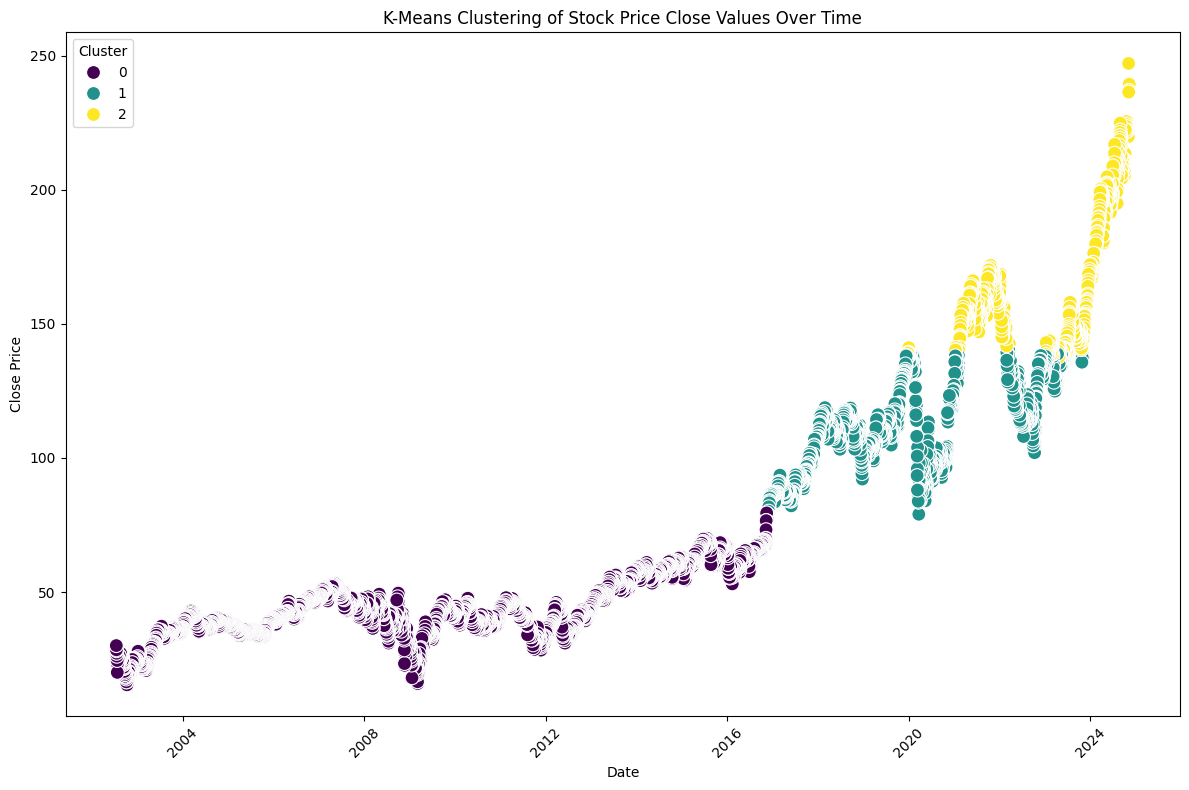

In [28]:

# Converting 'Date' column to datetime format
historical_df['Date'] = pd.to_datetime(historical_df['Date'])

# Features for clustering
features = ["Open", "High", "Low", "Close", "Volume"]

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(historical_df[features])

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
historical_df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualization of Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=historical_df, x='Date', y='Close', hue='Cluster', palette='viridis', s=100
)
plt.title("K-Means Clustering of Stock Price Close Values Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

This plot depicts how trades of a insider impacts price change over the years

Average Price Change with Insider Trade: -0.01%
Average Price Change without Insider Trade: nan%
Average Price Impact by Insider:
Low
14.96      0.188679
15.02    -18.461538
15.26     -3.134796
15.34     -7.213496
15.84      7.443366
            ...    
234.77     4.518149
235.22    -0.253186
235.78    -0.965356
238.76          NaN
239.00    -0.112707
Name: Price Change (%), Length: 4220, dtype: float64


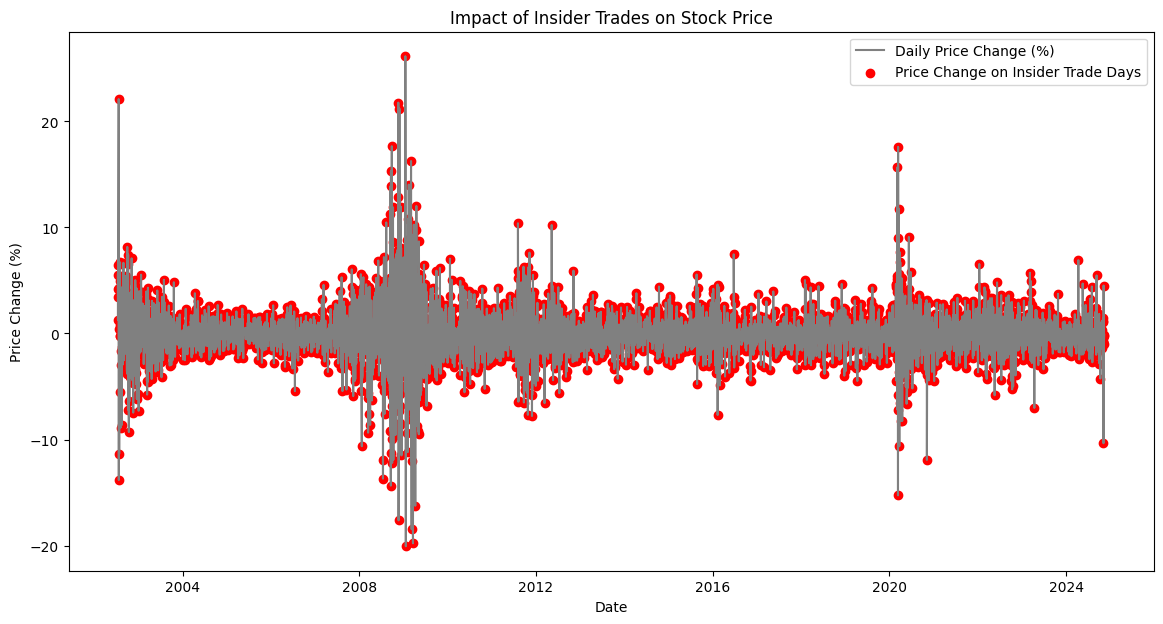

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# `historical_df` and `df` are the dataframes with the historical stock and insider data respectively.

# Step 1: Convert date columns to datetime
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Use iloc[:, 1] to reference the second column in df

# Step 2: Merge insider trades into historical data based on date
# We are using a left join to keep all rows from historical_df and add insider trades when available.
merged_df = pd.merge(historical_df, df, left_on='Date', right_on=df.columns[1], how='left')  # Use iloc[:, 1] for merging

# Step 3: Calculate price change percentage from the previous day
merged_df['Price Change (%)'] = merged_df['Close'].pct_change() * 100

# Step 4: Identify significant price impacts based on insider trades
# Create a column to indicate if a trade occurred on that date using `iloc[:, 5]` for Trade Type
merged_df['Insider Trade'] = merged_df.iloc[:, 5].notnull()

# Step 5: Calculate average price change on days with and without insider trades
average_price_change_with_trade = merged_df[merged_df['Insider Trade']]['Price Change (%)'].mean()
average_price_change_without_trade = merged_df[~merged_df['Insider Trade']]['Price Change (%)'].mean()

print(f"Average Price Change with Insider Trade: {average_price_change_with_trade:.2f}%")
print(f"Average Price Change without Insider Trade: {average_price_change_without_trade:.2f}%")

# Step 6: Analyze the impact of trades by specific insiders
# Group by insider name using `iloc[:, 3]` and aggregate the average price change
insider_impact = merged_df[merged_df['Insider Trade']].groupby(merged_df.iloc[:, 3])['Price Change (%)'].mean()

print("Average Price Impact by Insider:")
print(insider_impact)

# Step 7: Visualize the price changes on days with insider trades
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Price Change (%)'], label='Daily Price Change (%)', color='gray')
plt.scatter(
    merged_df.loc[merged_df['Insider Trade'], 'Date'],
    merged_df.loc[merged_df['Insider Trade'], 'Price Change (%)'],
    color='red', label='Price Change on Insider Trade Days'
)

plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.title('Impact of Insider Trades on Stock Price')
plt.legend()
plt.show()


Here we are creating a data frame named "merged_df" which consists of all the collumns in historical and insider transactions. Additinally we are creating 2  more Collumns which are as fallows:

**Future price** : it returns the price of the stock 7 days from the curent date.



**Target** : It returns the percentage change in stock price based on the closing price and future price

In [30]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data (Assuming `historical_df` and `df` are already loaded dataframes)
# Convert date columns to datetime
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Trade Date is at iloc[:, 1]

# Merge historical stock data with insider trade data on the date
merged_df = pd.merge(historical_df, df, left_on='Date', right_on=df.iloc[:, 1], how='left')

# Step 1: Calculate percentage change over the next 7 days
merged_df['Future Price'] = merged_df.iloc[:, 4].shift(-7)  # Close price column is at iloc[:, 4]
merged_df['Target'] = ((merged_df['Future Price'] - merged_df.iloc[:, 4]) / merged_df.iloc[:, 4]) * 100

# Drop rows with NaN values in the target column
merged_df.dropna(subset=['Target'], inplace=True)


In [31]:
print("Column names and indices in merged_df:")
print(merged_df.columns)
print("Number of columns in merged_df:", merged_df.shape[1])


Column names and indices in merged_df:
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Cluster',
       'Filing Date', 'Trade Date', 'Ticker', 'Insider Name', 'Title',
       'Trade Type', 'Price', 'Qty', 'Owned', 'ΔOwn', 'Value', 'Future Price',
       'Target'],
      dtype='object')
Number of columns in merged_df: 20


In [43]:
!pip install keras-tuner --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Assuming `historical_df` and `df` are already loaded dataframes

# Convert date columns to datetime
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Trade Date is at iloc[:, 1]

# Merge historical stock data with insider trade data on the date
merged_df = pd.merge(historical_df, df, left_on='Date', right_on=df.iloc[:, 1], how='left')

# Step 1: Calculate percentage change over the next 7 days
merged_df['Future Price'] = merged_df.iloc[:, 4].shift(-7)  # Close price column is at iloc[:, 4]
merged_df['Target'] = ((merged_df['Future Price'] - merged_df.iloc[:, 4]) / merged_df.iloc[:, 4]) * 100

# Drop rows with NaN values in the target column
merged_df.dropna(subset=['Target'], inplace=True)

# Debugging: Check columns in merged_df before selecting features
print("Columns in merged_df before selection:")
print(merged_df.columns)

# Step 2: Feature Selection using iloc with the correct indices from merged_df
# Selecting: Open, High, Low, Close, Volume, Future Price, Target
trade_df = merged_df.iloc[:, [1, 2, 3, 4, 5, 18, 19]]  # Open, High, Low, Close, Volume, Future Price, Target

# Debugging: Check data types and columns in trade_df before applying transformations
print("Data Types of Columns in trade_df:")
print(trade_df.dtypes)
print("Columns in trade_df:")
print(trade_df.columns)

# Step 3: Normalize numerical features (Open, High, Low, Close, Volume, Future Price)
# Correct the numerical_columns list to ensure it only includes numeric columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Future Price']

# Ensure these columns are numeric and ignore categorical ones
trade_df[numerical_columns] = trade_df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Now, apply MinMaxScaler only on numerical columns
scaler = MinMaxScaler()
trade_df[numerical_columns] = scaler.fit_transform(trade_df[numerical_columns])

# Step 5: Prepare data for LSTM
# Convert data to sequences of 7 days for each sample
sequence_length = 7

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length, :-1].values  # Exclude 'Target' column
        y = data.iloc[i+seq_length, -1]  # 'Target' column
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(trade_df, sequence_length)

# Ensure the input data is of type float32
X = X.astype('float32')
y = y.astype('float32')

# Step 6: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Build the LSTM model using Input layer for flexible input shape
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),  # Input layer for dynamic input shape
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Output layer for predicting the target (price change)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 8: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Step 9: Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Step 10: Prepare data for prediction
# Ensure X_predict contains all required features and is normalized
X_predict = trade_df.iloc[-sequence_length:, :-1]  # Last 7 rows, excluding Target
X_predict[numerical_columns] = scaler.transform(X_predict[numerical_columns])  # Apply scaler to X_predict

# Convert prediction data to sequences for LSTM
X_predict = X_predict.values.reshape(1, sequence_length, len(numerical_columns))

# Make predictions
predictions = model.predict(X_predict)
print(f"Predicted Target: {predictions[0][0]}")


Epoch 1/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 28.0172 - mae: 3.5888 - val_loss: 25.4987 - val_mae: 3.4291
Epoch 2/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 27.4508 - mae: 3.5026 - val_loss: 25.5259 - val_mae: 3.4317
Epoch 3/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 28.3806 - mae: 3.5385 - val_loss: 25.5818 - val_mae: 3.4099
Epoch 4/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 26.0072 - mae: 3.4677 - val_loss: 25.8218 - val_mae: 3.4162
Epoch 5/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 27.5535 - mae: 3.5608 - val_loss: 25.6455 - val_mae: 3.4164
Epoch 6/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 26.9347 - mae: 3.4894 - val_loss: 25.6244 - val_mae: 3.3979
Epoch 7/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 30.0914 - mae: 3.6241 - val_loss: 25.3701 - val_mae: 3.4029
Epoch 8/20
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 26.4121 - mae: 3.4920 - val_loss: 25.5339 - val_mae: 3.4170
Epoch 9/20
130/130 ━━━━━━━━━━━━━━━━━━━

In [35]:
# Step 1: Prepare and merge data
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Trade Date

merged_df = pd.merge(historical_df, df, left_on='Date', right_on=df.iloc[:, 1], how='left')
merged_df.head()

,Date,Open,High,Low,Close,Volume,Cluster,Filing Date,Trade Date,Ticker,Insider Name,Title,Trade Type,Price,Qty,Owned,ΔOwn,Value
0,2024-11-12,240.55,241.46,238.76,239.56,6845980,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-11,240.00,242.10,239.00,239.29,9017079,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-11-08,239.34,239.34,235.78,236.98,9502100,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-11-07,244.50,244.57,235.22,236.38,16451070,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-11-06,235.00,248.00,234.77,247.06,23987750,2,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split




# Step 1: Prepare and merge data
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Trade Date

merged_df = pd.merge(historical_df, df, left_on='Date', right_on=df.iloc[:, 1], how='left')

# Calculate percentage change over the next 7 days
merged_df['Future Price'] = merged_df.iloc[:, 4].shift(-7)
merged_df['Target'] = ((merged_df['Future Price'] - merged_df.iloc[:, 4]) / merged_df.iloc[:, 4]) * 100
merged_df.dropna(subset=['Target'], inplace=True)

# Select features: Open, High, Low, Close, Volume, Future Price, Target
trade_df = merged_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Future Price', 'Target']]
trade_df = trade_df.dropna()  # Drop any rows with missing values
trade_df.head()

,Open,High,Low,Close,Volume,Future Price,Target
0,240.55,241.46,238.76,239.56,6845980,222.94,-6.937719
1,240.00,242.10,239.00,239.29,9017079,221.92,-7.258974
2,239.34,239.34,235.78,236.98,9502100,224.41,-5.304245
3,244.50,244.57,235.22,236.38,16451070,222.90,-5.702682
4,235.00,248.00,234.77,247.06,23987750,225.50,-8.726625


Tis is the LSTM model we are still working on.
this specific model strongly relies on historical data to make predictions.

**We train the model on all the features: Open, High, Low, Close, Volume, Future Price.**

**It makes predictions using only the features: Open, High, Low, Close, Volume.**

The value it predicts is **"Future Price"**

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from kerastuner.tuners import RandomSearch



# Step 1: Prepare and merge data
historical_df['Date'] = pd.to_datetime(historical_df['Date'])
df.iloc[:, 1] = pd.to_datetime(df.iloc[:, 1])  # Trade Date

merged_df = pd.merge(historical_df, df, left_on='Date', right_on=df.iloc[:, 1], how='left')

# Calculate percentage change over the next 7 days
merged_df['Future Price'] = merged_df.iloc[:, 4].shift(-7)
merged_df['Target'] = ((merged_df['Future Price'] - merged_df.iloc[:, 4]) / merged_df.iloc[:, 4]) * 100
merged_df.dropna(subset=['Target'], inplace=True)

# Select features: Open, High, Low, Close, Volume, Future Price, Target
trade_df = merged_df[['Open', 'High', 'Low', 'Close', 'Volume', 'Future Price', 'Target']]
trade_df = trade_df.dropna()  # Drop any rows with missing values

# Normalize numerical features
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Future Price']
scaler = MinMaxScaler()
trade_df[numerical_columns] = scaler.fit_transform(trade_df[numerical_columns])

# Step 2: Create sequences
sequence_length = 7

def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:i+seq_length, :-1].values  # Features
        y = data.iloc[i+seq_length, -1]  # Target
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

X, y = create_sequences(trade_df, sequence_length)
X = X.astype('float32')
y = y.astype('float32')

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Define hyperparameter tuner
def build_model(hp):
    model = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(hp.Int('units', min_value=32, max_value=128, step=16), return_sequences=True),
        Dropout(hp.Float('dropout_rate', 0.1, 0.5, step=0.1)),
        LSTM(hp.Int('units', min_value=32, max_value=128, step=16)),
        Dropout(hp.Float('dropout_rate', 0.1, 0.5, step=0.1)),
        Dense(1)
    ])
    model.compile(
        optimizer='adam',
        loss='mse',
        metrics=['mae']
    )
    return model

tuner = RandomSearch(
    build_model,
    objective='val_mae',
    max_trials=5,
    executions_per_trial=2,
    directory='lstm_tuning',
    project_name='stock_prediction'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.1, batch_size=32, verbose=1)

# Get the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

# Step 5: Train the best model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1, verbose=1)

# Step 6: Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

# Step 7: Make predictions
X_predict = trade_df.iloc[-sequence_length:, :-1].values
X_predict = scaler.transform(X_predict)
X_predict = X_predict.reshape(1, sequence_length, len(numerical_columns))
predictions = model.predict(X_predict)

print(f"Predicted Target Change: {predictions[0][0]:.2f}%")


Trial 5 Complete [00h 01m 04s]
val_mae: 3.3429758548736572

Best val_mae So Far: 3.3429758548736572
Total elapsed time: 00h 04m 16s
Epoch 1/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 29.0894 - mae: 3.6079 - val_loss: 25.9210 - val_mae: 3.5076
Epoch 2/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 27.3230 - mae: 3.4821 - val_loss: 25.4523 - val_mae: 3.4230
Epoch 3/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 26.8792 - mae: 3.4730 - val_loss: 25.5962 - val_mae: 3.4039
Epoch 4/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 27.5180 - mae: 3.5041 - val_loss: 25.5940 - val_mae: 3.3991
Epoch 5/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 26.9062 - mae: 3.4629 - val_loss: 25.6716 - val_mae: 3.3949
Epoch 6/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 27.5537 - mae: 3.4976 - val_loss: 25.4535 - val_mae: 3.4011
Epoch 7/30
130/130 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 24.7555 - mae: 3.4367 - val_loss: 25.4905 - val_mae: 3.4126
Epoch 8/30
130/130 ━━

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
Predicted Target Change: 9.65%


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


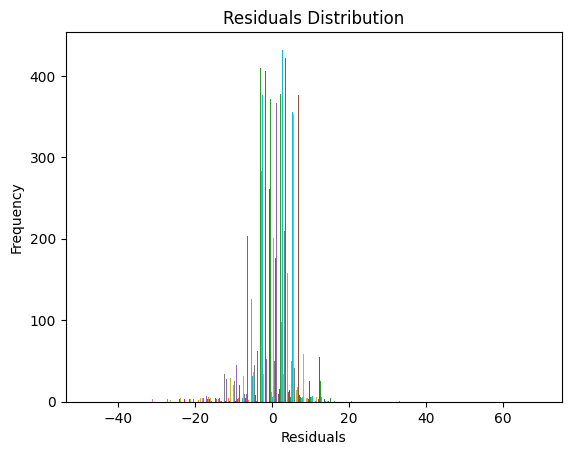

In [ ]:
residuals = y_test - model.predict(X_test)
plt.hist(residuals, bins=50)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Evaluate the model on the test data
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Step 2: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 3: Calculate additional performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8237 - mae: 2.2528
Test Loss (MSE): 12.6228
Test MAE: 2.3108
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error (MSE): 12.6228
R-squared (R²): 0.5695


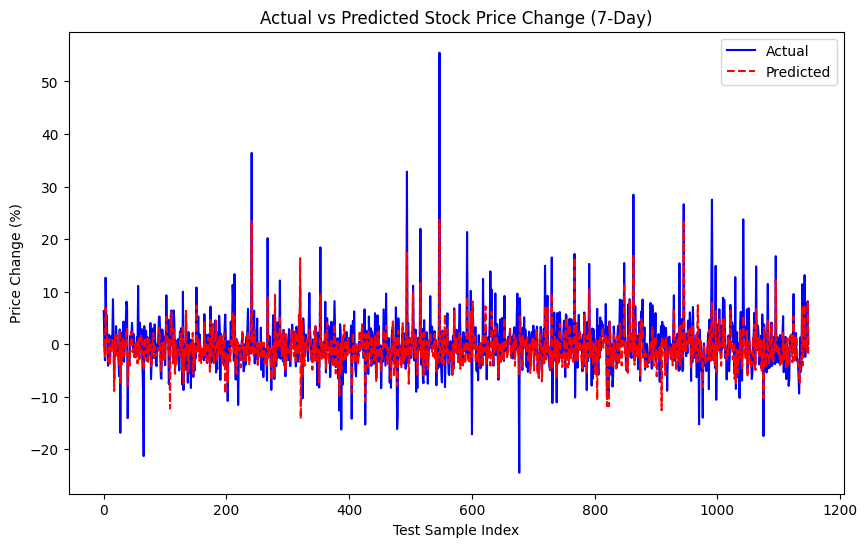

In [ ]:
# Step 4: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Price Change (7-Day)')
plt.xlabel('Test Sample Index')
plt.ylabel('Price Change (%)')
plt.legend()
plt.show()

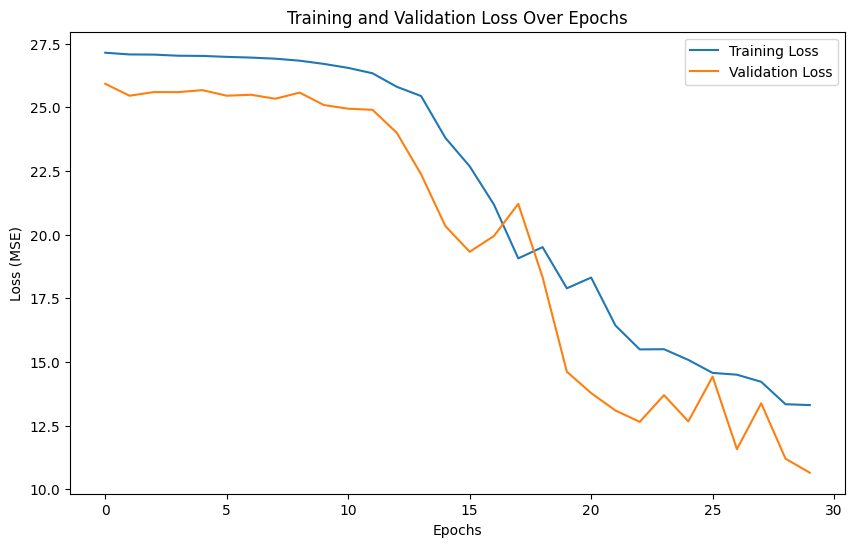

In [ ]:
# Step 5: Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

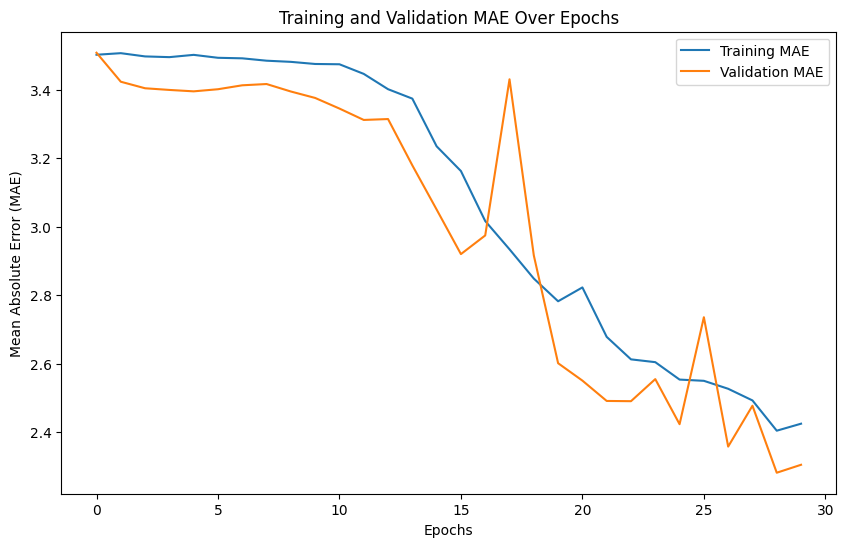

In [ ]:
# Step 6: Plot the training and validation MAE curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Test MAE: 2.5806
Test MSE: 15.9151
Test R^2: 0.4572


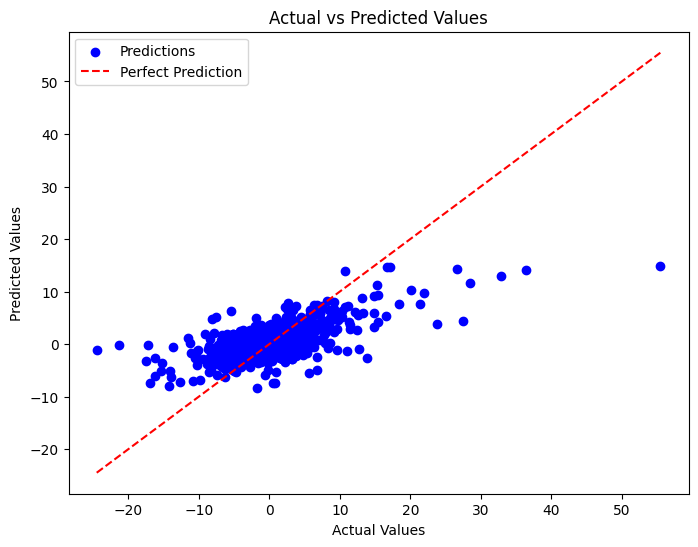

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
predictions = model.predict(X_test)  # Replace X_test with your test features

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)  # Replace y_test with actual target values

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate R^2 Score
r2 = r2_score(y_test, predictions)

# Print out evaluation metrics
print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R^2: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()
